In [1]:
%load_ext notexbook

In [2]:
%texify

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

%matplotlib widget

In [7]:
from bins import Hist, Bin

In [8]:
histogram_21l = Hist('data/largedrum_21L_dense_MedianCut_3cmVoxel_all.discriminator.root')
histogram_bitumen = Hist(infile='data/largedrum_onlybitumen_dense_newmetrics_3cmVoxel_April2021.discriminator.root')
histogram_hydrogen = Hist(infile='data/largedrum_onlyhydrogen_dense_newmetrics_3cmVoxel_April2021.discriminator.root')

In [9]:
histogram_1l = Hist('data/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root')
histogram_21l_shifted= Hist('data/largedrum_21L_5cm_dense_newmetrics_3cmVoxel_April2021.discriminator.root')

In [10]:
histogram_8blocks =Hist('data/largedrum_0.5L_8Cubes_dense_newmetrics_3cmVoxel_April2021.discriminator.root')

In [11]:
drum_21l =  histogram_21l.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_bitumen = histogram_bitumen.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_hydrogen = histogram_hydrogen.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_21l_shifted = histogram_21l.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_1l = histogram_1l.cylinder_select(threshold=290, edges_x=Bin(-400,400))

drum_21l_hydr = histogram_21l.cylinder_select(threshold=90, edges_x=Bin(-90,90))
drum_21l_hydr_shifted = histogram_21l_shifted.cylinder_select(threshold=90, edges_x=Bin(-90,90))
drum_21l_hydr = histogram_21l.cylinder_select(threshold=90, edges_x=Bin(-90,90))
drum_1l_hydr = histogram_1l.cylinder_select(threshold=90, edges_x=Bin(-90,90))

In [12]:
np.unique(np.where(drum_21l_hydr.padded_histogram>0)[0]),np.unique(np.where(drum_21l_hydr.padded_histogram>0)[1]),np.unique(np.where(drum_21l_hydr.padded_histogram>0)[2])

(array([30, 31, 32, 33, 34, 35]),
 array([30, 31, 32, 33, 34, 35]),
 array([14, 15, 16, 17, 18]))

In [13]:
drum_21l_h_map = np.zeros_like(histogram_21l.histogram)

In [14]:
drum_21l_h_map[np.where(drum_21l_hydr.padded_histogram)]=1

In [15]:
cube_centre_positions = [[130,20,0],[-150,10,0],[20,150,0],[10,-160,0],[140,-130,0],[-120,-120,0],[-110,110,0]]

In [16]:
cube_size=[80,80,80]

In [17]:
cube_edges = [[Bin(i-40, i+40),Bin(j-40,j+40), Bin(k-40,k+40)] for i, j, k in cube_centre_positions]

In [18]:
cubes_hist = [histogram_8blocks.cube_select(edge_cut=sel) for sel in cube_edges]

/Users/yw18581/UoB/CHANCE/analysis_playground/bins.py:360: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
/Users/yw18581/UoB/CHANCE/analysis_playground/bins.py:363: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(
/Users/yw18581/UoB/CHANCE/analysis_playground/bins.py:366: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(


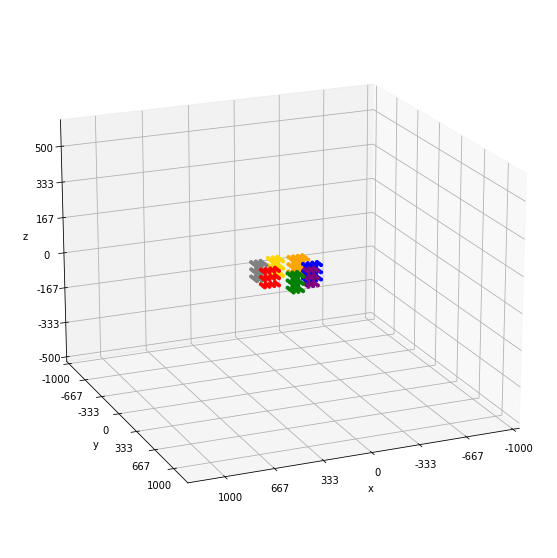

In [19]:
colors = ['blue', 'green', 'gold', 'grey', 'orange','purple']

fig,ax = cubes_hist[0].plot(figsize=(10,10), cbar=False, color='red', cmap=None)
for i in range(1,7):
    cubes_hist[i].plot(newfig=False, fig=fig, ax=ax, cbar=False, color=colors[i-1], cmap=None)
plt.show()

In [20]:
cubes = [cube.padded_histogram for cube in cubes_hist]

In [21]:
from operator import add
from functools import reduce

In [22]:
cubes_hist = reduce(add,cubes)

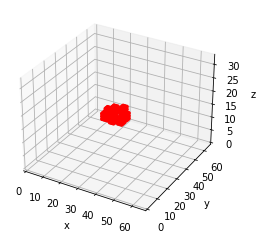

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xx, yy, zz = np.where(cubes_hist>0)
pnt3d = ax.scatter(xx, yy, zz, c='red', s=10, alpha=1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.axes.set_xlim3d(left=0, right=cubes_hist.shape[0])
ax.axes.set_ylim3d(bottom=0, top=cubes_hist.shape[1])
ax.axes.set_zlim3d(bottom=0, top=cubes_hist.shape[2])
plt.show()

In [24]:
cubes_hist[cubes_hist>0]

array([11.071157 , 11.136771 , 11.081544 , 11.067833 , 11.092682 ,
       11.141634 , 11.114475 , 11.067545 , 11.179896 , 11.023628 ,
       11.132425 , 11.109426 , 11.05685  , 11.125597 , 11.152256 ,
       11.031165 , 11.140619 , 11.064542 , 11.032261 , 11.154139 ,
       11.171574 , 11.1118   , 11.016326 , 11.133511 , 11.148528 ,
       11.157415 , 11.123158 , 11.1189   , 11.123298 , 11.079325 ,
       10.969074 , 11.022745 , 11.024881 , 11.101497 , 11.050451 ,
       11.0469265, 11.073479 , 11.075017 , 11.100142 , 11.090674 ,
       11.112572 , 11.106564 , 11.083051 , 11.072269 , 11.1401205,
       11.032749 , 11.0106945, 11.084025 , 11.091183 , 11.093299 ,
       11.1498165, 11.104563 , 11.086711 , 11.184699 , 11.070195 ,
       11.141534 , 11.136261 , 11.10023  , 11.030056 , 11.070563 ,
       10.974605 , 11.136171 , 11.034475 , 11.123839 , 11.172834 ,
       11.197262 , 11.015702 , 11.092109 , 11.164502 , 11.055524 ,
       11.058158 , 11.07746  , 11.032592 , 11.185266 , 11.1754